# Ejercicio 13: Resolver una EDO

## Sebastián Tapia

## Ejercicio
Resolver y graficar los resultados de la siguiente EDO usando los metodos de Euler, Series de Taylor y RK4:

$$y'(t) = -2y(t) + \cos(4t)$$

con condición inicial $y_0 = 3$, donde por cada metodo debe generar un grafico con al menos tres curvas que representen 
distintos valores de $h$ tal que las lineas dibujadas representen a $y(t)$ con diferente presicion, ejemplo: resolver para $h = 0.8$, $h = 0.2$ y $h = 0.02$ con $t\in(0, 2)$

In [83]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def euler_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            y_values[i] = y_values[i - 1] + h*function(t_values[i-1], y_values[i-1], )
    return t_values, y_values


def taylor_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t) + (1/2)*h*h*(-2*(-2*y + np.cos(4*t)) - 4*np.sin(4*t))

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            y_values[i] = y_values[i - 1] + h*function(t_values[i-1], y_values[i-1],)
    return t_values, y_values


def euler_modified_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            
            K1 = h/2*function(t_values[i-1], y_values[i-1])

            y_values[i] = y_values[i - 1] + h*function(t_values[i-1]+h/2, y_values[i-1]+K1)

    return t_values, y_values


def euler_improved_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            
            K1 = h*function(t_values[i-1], y_values[i-1])
            F = function(t_values[i-1], y_values[i-1]) + function(t_values[i-1]+h, y_values[i-1]+K1)
            
            y_values[i] = y_values[i - 1] + h/2*F

    return t_values, y_values


def RK4_method(h, time):
    iterations = int(time / h)

    t_values = np.zeros(iterations)
    y_values = np.zeros(iterations)
    function = lambda t, y : -2*y + np.cos(4*t)

    for i in range(iterations):
        if i == 0:
            t_values[i] = 0
            y_values[i] = 3
        else:
            t_values[i] = t_values[i - 1] + h
            
            K1 = function(t_values[i-1], y_values[i-1])
            K2 = function(t_values[i-1]+h/2, y_values[i-1]+h/2*K1)
            K3 = function(t_values[i-1]+h/2, y_values[i-1]+h/2*K2)
            K4 = function(t_values[i-1]+h, y_values[i-1]+h*K3)
            
            y_values[i] = y_values[i - 1] + h/6*(K1 + 2*K2 + 2*K3 + K4)

    return t_values, y_values

In [84]:
def plot_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='función y[t]',
        title='EDO usando método de Euler')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_taylor():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = taylor_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de series de Taylor, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='función y[t]',
        title='EDO usando método de series de Taylor')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_modified_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_modified_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler modificado, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='función y[t]',
        title='EDO usando método de Euler modificado')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_improved_euler():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = euler_improved_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de Euler mejorado, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='función y[t]',
        title='EDO usando método de Euler mejorado')
    ax.legend()
    ax.grid()

    plt.show()

    
def plot_RK4():
    time = 5
    h_values = np.array([0.7, 0.2, 0.05])

    fig, ax = plt.subplots(figsize=(10,7))

    t_to_plot = np.linspace(0, time, 100)
    y2 = np.sin(4*t_to_plot)/5 + np.cos(4*t_to_plot)/10 + 2.9/(np.exp(2*t_to_plot))
    ax.plot(t_to_plot, y2, label = 'Ecuación analitica')

    for h in h_values:

        t_values_h, y_values_h = RK4_method(h, time)
        ax.plot(t_values_h, y_values_h, label = 'Metodo de RK4, con h={}'.format(h))


    ax.set(xlabel='t [segundos]', ylabel='función y[t]',
        title='EDO usando método de RK4')
    ax.legend()
    ax.grid()

    plt.show()

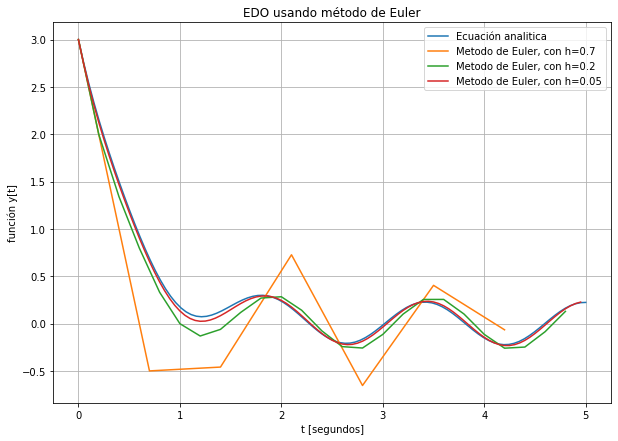

In [85]:
plot_euler()

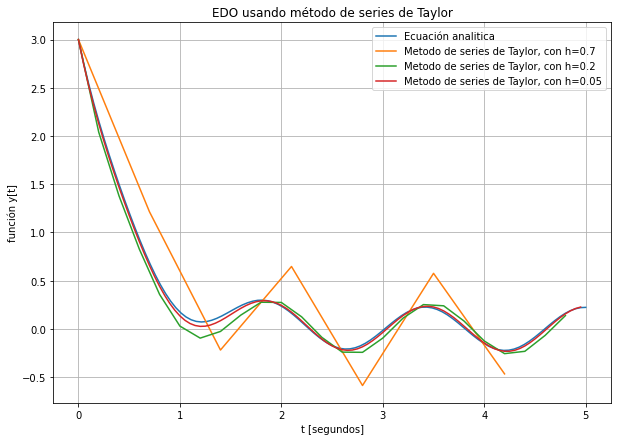

In [86]:
plot_taylor()

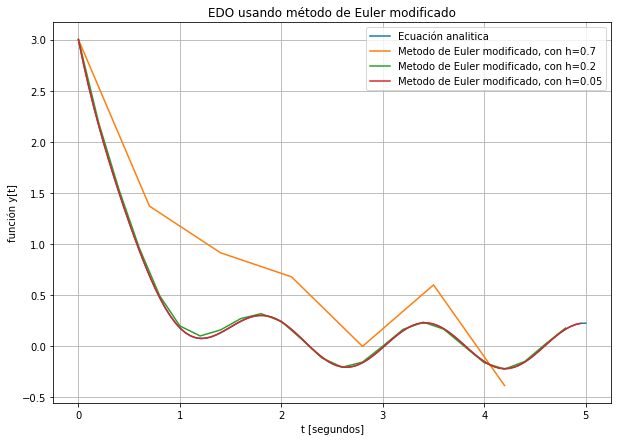

In [87]:
plot_modified_euler()

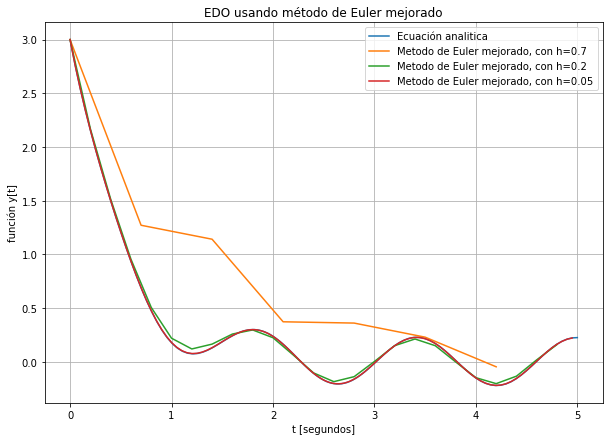

In [88]:
plot_improved_euler()

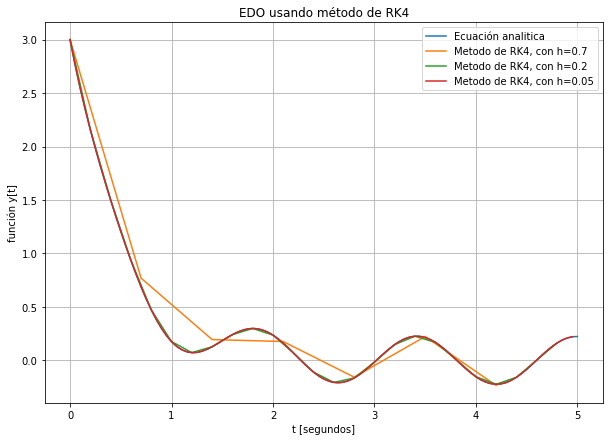

In [89]:
plot_RK4()